In [4]:
import os
import requests
import pandas as pd
import joblib
import nltk

In [14]:
# Cargar el dataset con las etiquetas que ya avanzaste [cite: 109]
df_personal = pd.read_csv("pln_datos_github.csv")

# Cargar el vectorizador de unigramas para transformar tus textos [cite: 57]
vectorizer_uni = joblib.load("tfidf_vectorizer_unigramas.joblib")
vectorizer_personal_bi = joblib.load("tfidf_vectorizer_bigramas.joblib")

# Verificar que los datos estén ahí
print(f"Total de registros para analizar: {len(df_personal)}")
df_personal.head()

Total de registros para analizar: 915


,tipo,numero,titulo,descripcion,comentarios,Comentario Preprocesado,Vector FT-IDF unigrama,Vector FT-IDF bigrama,Etiqueta: positivo(1) | neutral(0) | negativo(-1)
0,Issue,4793,MOD347 : Error E010330 Caracteres no válidos '...,module: l10n_es_aeat_mod347\nversion: 18.0\n\n...,Siendo tratado en #4784,tratar,{'tratar': 1.0},{},0.0
1,Issue,4760,Actualizar modelo 190 en rama 16.0,"Actualmente, al generar el fichero del modelo ...","Además, hemos podido comprobar que el mismo pr...",poder comprobar problema reproducir odoo utili...,"{'poder': 0.0735, 'comprobar': 0.1102, 'proble...","{'poder comprobar': 0.3802, 'generar fichero':...",0.0
2,Issue,4760,Actualizar modelo 190 en rama 16.0,"Actualmente, al generar el fichero del modelo ...","Sí, desde luego la solución pasa por llevar es...",solución pasar cambio ambos rama cuestión esta...,"{'rama': 0.1296, 'cambio': 0.0879, 'mantener':...","{'solución pasar': 0.4582, 'versión posible': ...",1.0
3,Issue,4760,Actualizar modelo 190 en rama 16.0,"Actualmente, al generar el fichero del modelo ...",@pedrobaeza Gracias por la aclaración.\nDe acu...,pedrobaeza gracias aclaración poner backport c...,"{'rama': 0.2823, 'ejercicio': 0.2883, 'backpor...","{'backport cambio': 0.4332, 'pedrobaeza gracia...",1.0
4,Issue,4681,[17.0] ImporteTotal=0.0 verifactu intracomunit...,## Module\nl10n_es_verifactu_oca\n\n## Describ...,Hola.\n\nAgradecería si alguien puede confirma...,hola agradecer alguien confirmar problema veri...,"{'problema': 0.1494, 'error': 0.1509, 'gracias...","{'funcionar correctamente': 0.6221, 'aparecer ...",0.0


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
col_etiqueta = 'Etiqueta: positivo(1) | neutral(0) | negativo(-1)'
df_sentimiento = df_personal[df_personal[col_etiqueta].notna()].copy()
df_sentimiento.head()

,tipo,numero,titulo,descripcion,comentarios,Comentario Preprocesado,Vector FT-IDF unigrama,Vector FT-IDF bigrama,Etiqueta: positivo(1) | neutral(0) | negativo(-1)
0,Issue,4793,MOD347 : Error E010330 Caracteres no válidos '...,module: l10n_es_aeat_mod347\nversion: 18.0\n\n...,Siendo tratado en #4784,tratar,{'tratar': 1.0},{},0.0
1,Issue,4760,Actualizar modelo 190 en rama 16.0,"Actualmente, al generar el fichero del modelo ...","Además, hemos podido comprobar que el mismo pr...",poder comprobar problema reproducir odoo utili...,"{'poder': 0.0735, 'comprobar': 0.1102, 'proble...","{'poder comprobar': 0.3802, 'generar fichero':...",0.0
2,Issue,4760,Actualizar modelo 190 en rama 16.0,"Actualmente, al generar el fichero del modelo ...","Sí, desde luego la solución pasa por llevar es...",solución pasar cambio ambos rama cuestión esta...,"{'rama': 0.1296, 'cambio': 0.0879, 'mantener':...","{'solución pasar': 0.4582, 'versión posible': ...",1.0
3,Issue,4760,Actualizar modelo 190 en rama 16.0,"Actualmente, al generar el fichero del modelo ...",@pedrobaeza Gracias por la aclaración.\nDe acu...,pedrobaeza gracias aclaración poner backport c...,"{'rama': 0.2823, 'ejercicio': 0.2883, 'backpor...","{'backport cambio': 0.4332, 'pedrobaeza gracia...",1.0
4,Issue,4681,[17.0] ImporteTotal=0.0 verifactu intracomunit...,## Module\nl10n_es_verifactu_oca\n\n## Describ...,Hola.\n\nAgradecería si alguien puede confirma...,hola agradecer alguien confirmar problema veri...,"{'problema': 0.1494, 'error': 0.1509, 'gracias...","{'funcionar correctamente': 0.6221, 'aparecer ...",0.0


In [18]:
# Preparar X (vectores) y y (etiquetas)
# Transformamos los comentarios preprocesados usando el vectorizador cargado
X = vectorizer_uni.transform(df_sentimiento['Comentario Preprocesado'].astype(str))
y = df_sentimiento[col_etiqueta].astype(int)

# Dividir en entrenamiento y prueba (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Crear y entrenar el modelo (Regresión Logística con peso balanceado)
modelo_sentimiento = LogisticRegression(max_iter=1000, class_weight='balanced')
modelo_sentimiento.fit(X_train, y_train)

# Predicciones
y_pred = modelo_sentimiento.predict(X_test)

# Reportar métricas requeridas: Accuracy o F1-macro (RF-04)
print("=== REPORTE DE EVALUACIÓN (RF-04) ===")
print(f"Accuracy General: {accuracy_score(y_test, y_pred):.4f}")
print("\nMétricas detalladas:")
print(classification_report(y_test, y_pred, target_names=['Negativo (-1)', 'Neutral (0)', 'Positivo (1)']))

=== REPORTE DE EVALUACIÓN (RF-04) ===
Accuracy General: 0.6557

Métricas detalladas:
               precision    recall  f1-score   support

Negativo (-1)       0.62      0.72      0.67        18
  Neutral (0)       0.64      0.64      0.64        25
 Positivo (1)       0.73      0.61      0.67        18

     accuracy                           0.66        61
    macro avg       0.66      0.66      0.66        61
 weighted avg       0.66      0.66      0.66        61



In [20]:
from sklearn.cluster import KMeans

# PASO 1: Preparar la matriz completa para clustering
# Usamos 'vectorizer_uni' que cargaste arriba y transformamos TODO el dataset
corpus_completo = df_personal['Comentario Preprocesado'].fillna('').astype(str)
X_clustering = vectorizer_uni.transform(corpus_completo)

# PASO 2: Configurar K-Means (4 grupos para probar)
num_clusters = 4
kmeans = KMeans(n_clusters=num_clusters, random_state=42, n_init=10)

# PASO 3: Entrenar el modelo de agrupación
kmeans.fit(X_clustering)

# PASO 4: Obtener las palabras clave de cada grupo
# Usamos centroids para ver cuáles son las palabras "centrales" de cada cluster
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terminos = vectorizer_uni.get_feature_names_out() # Usamos tu variable 'vectorizer_uni'

print("=== IDENTIFICACIÓN DE TEMAS RECURRENTES (RF-05) ===\n")
for i in range(num_clusters):
    print(f"Grupo {i}:")
    # Tomamos los 10 términos más representativos
    palabras_clave = [terminos[ind] for ind in order_centroids[i, :10]]
    print(f"  Palabras clave: {', '.join(palabras_clave)}")
    print("-" * 30)

# PASO 5: Guardar el resultado en el DataFrame principal
df_personal['Tema_Sugerido'] = kmeans.labels_

# Vista rápida de cuántos mensajes hay por tema
print("\nDistribución de mensajes por tema:")
print(df_personal['Tema_Sugerido'].value_counts())

=== IDENTIFICACIÓN DE TEMAS RECURRENTES (RF-05) ===

Grupo 0:
  Palabras clave: pr, gracia, él, cerrar, módulo, poder, gracias, versión, favor, añadir
------------------------------
Grupo 1:
  Palabras clave: pedrobaeza, gracias, revisar, poder, gracia, haraldpantar, él, almumu, ojo, mergear
------------------------------
Grupo 2:
  Palabras clave: corazón, rojo, encontrado, encontrar, enekoaira, enfoque, enlace, enric, entender, entendido
------------------------------
Grupo 3:
  Palabras clave: factura, error, odoo, impuesto, problema, módulo, él, caso, sii, fecha
------------------------------

Distribución de mensajes por tema:
Tema_Sugerido
0    423
3    309
2    125
1     58
Name: count, dtype: int64


In [23]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# PASO 1: Calcular la Matriz de Similitud (RF-06)
# Comparamos todos los mensajes contra todos usando la similitud coseno
# Esto genera una matriz de 915x915 (muy rápido de procesar)
matriz_similitud = cosine_similarity(X_clustering)

# PASO 2: Crear la función de búsqueda "Dado un mensaje, mostrar similares"
def recomendar_similares(indice_mensaje, n=3):
    """
    Busca los 'n' mensajes más parecidos al mensaje que está en la fila 'indice_mensaje'
    """
    # Validar que el índice exista
    if indice_mensaje >= len(df_personal):
        return "Error: Índice fuera de rango"

    # Obtener las puntuaciones de similitud para este mensaje
    puntuaciones = matriz_similitud[indice_mensaje]

    # Ordenar los índices de mayor a menor similitud
    # argsort devuelve los índices ordenados, tomamos los últimos (mayores) e invertimos
    indices_similares = np.argsort(puntuaciones)[::-1]

    # El primer resultado siempre es él mismo (similitud 1.0), así que lo saltamos [1:n+1]
    top_indices = indices_similares[1:n+1]

    print(f" MENSAJE ORIGINAL (ID: {indice_mensaje}):")
    print(f"Texto: {df_personal.loc[indice_mensaje, 'Comentario Preprocesado'][:150]}...")
    print(f"Tema: {df_personal.loc[indice_mensaje, 'Tema_Sugerido']}")
    print("=" * 60)
    print(f"⬇ {n} MENSAJES MÁS SIMILARES ENCONTRADOS:")

    for i in top_indices:
        similitud = puntuaciones[i]
        texto_sim = df_personal.loc[i, 'Comentario Preprocesado']
        # Recuperamos el ID original del CSV para referencia
        id_real = df_personal.loc[i, 'numero']

        print(f"\n [Similitud: {similitud:.4f}] - ID Real: {id_real}")
        print(f"   {texto_sim[:200]}...") # Mostramos solo los primeros 200 caracteres

# PASO 3: Probar la función con un caso real
# Probamos con el índice 10 (puedes cambiar este número para ver otros)
recomendar_similares(10, n=3)

 MENSAJE ORIGINAL (ID: 10):
Texto: poder proponer parche agradecer año desbordado...
Tema: 0
⬇ 3 MENSAJES MÁS SIMILARES ENCONTRADOS:

 [Similitud: 0.4518] - ID Real: 4652
   pedrobaeza poder echar él ojo proponer parche directamente...

 [Similitud: 0.4347] - ID Real: 3829
   poder proponer pr arreglando él...

 [Similitud: 0.2441] - ID Real: 4639
   usar complica vida ver necesario poder proponer pr cara guiñar ojo...


--- PRUEBA DE SIMILITUD ---
MENSAJE ORIGINAL (ID: 0):
tratar
----------------------------------------
SIMILAR (Score: 0.455):
cerrar tratar pr añadir ruido

SIMILAR (Score: 0.317):
hola módulo nombre dirigir favor consulta foro aeodoo tratar él problema módulo

SIMILAR (Score: 0.313):
faltar módulo l10n_es_sii_reav añadir mapeo corresponder tratar clave adecuado posición fiscal



/tmp/ipython-input-1090041517.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Tema_Sugerido', data=df_personal, palette='viridis')


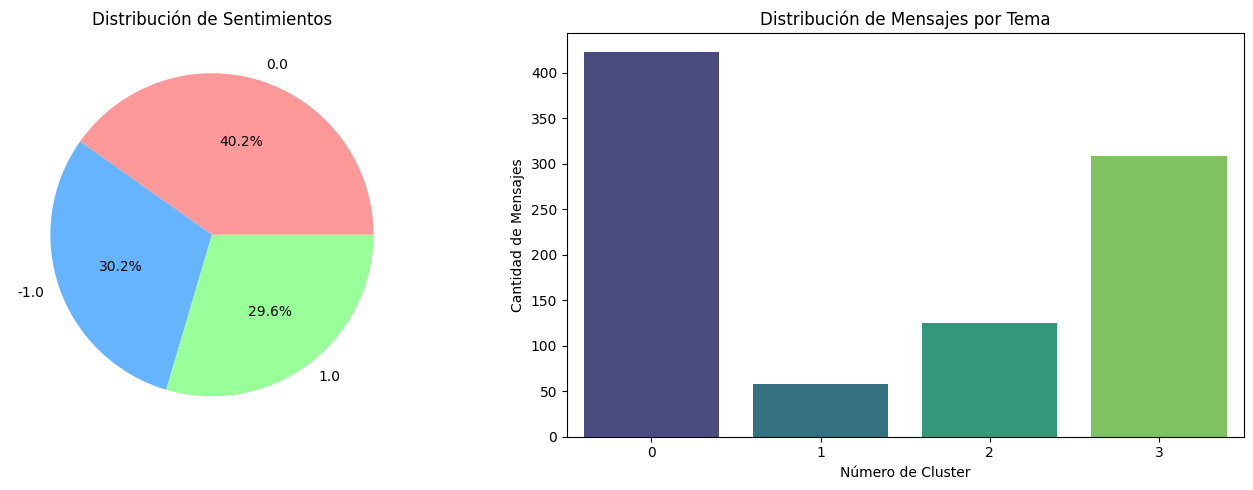

Archivo 'pln_datos_final_completo.csv' exportado exitosamente.


In [24]:
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ==========================================
# 1. RF-06: SIMILITUD TEXTUAL
# ==========================================
# Calcular matriz de similitud coseno entre todos los documentos [cite: 78]
matriz_similitud = cosine_similarity(X_clustering)

def obtener_similares(indice, n=3):
    """
    Imprime los 'n' mensajes más similares al indicado por 'indice'.
    Requerimiento: 'Dado un mensaje, mostrar los mensajes más similares'[cite: 80].
    """
    if indice >= len(df_personal):
        return print("Índice fuera de rango")

    similares_idx = np.argsort(matriz_similitud[indice])[::-1][1:n+1]

    print(f"MENSAJE ORIGINAL (ID: {indice}):")
    print(df_personal.iloc[indice]['Comentario Preprocesado'][:100])
    print("-" * 40)

    for i in similares_idx:
        score = matriz_similitud[indice][i]
        print(f"SIMILAR (Score: {score:.3f}):")
        print(df_personal.iloc[i]['Comentario Preprocesado'][:100])
        print("")

# Prueba técnica
print("--- PRUEBA DE SIMILITUD ---")
obtener_similares(0)

# ==========================================
# 2. GENERACIÓN DE GRÁFICOS (PARA INFORME RF-07)
# ==========================================
# Configuración visual
plt.figure(figsize=(14, 5))

# Gráfico A: Distribución de Sentimientos [cite: 19]
plt.subplot(1, 2, 1)
conteo_sent = df_personal['Etiqueta: positivo(1) | neutral(0) | negativo(-1)'].value_counts()
plt.pie(conteo_sent, labels=conteo_sent.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])
plt.title('Distribución de Sentimientos')

# Gráfico B: Distribución de Temas (Clustering) [cite: 20]
plt.subplot(1, 2, 2)
sns.countplot(x='Tema_Sugerido', data=df_personal, palette='viridis')
plt.title('Distribución de Mensajes por Tema')
plt.xlabel('Número de Cluster')
plt.ylabel('Cantidad de Mensajes')

plt.tight_layout()
plt.savefig('graficos_informe.png') # Guarda la imagen para el documento
plt.show()

# ==========================================
# 3. EXPORTACIÓN FINAL
# ==========================================
# Guardar dataset con todas las columnas nuevas para el repositorio [cite: 109]
df_personal.to_csv("pln_datos_final_completo.csv", index=False, encoding='utf-8-sig')
print("Archivo 'pln_datos_final_completo.csv' exportado exitosamente.")